In [1]:
# Based on Erik's script: plotting_NEMO.ipynb
%pylab inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from matplotlib.patches import Polygon, Ellipse
from glob import glob
import cmocean.cm as cmo
import gsw
import pickle

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
savefig = False #True
figext = '.pdf'
    
degsym = u'\u00B0'

def savefig(fignum, figext=figext, savefig=savefig):
    figname = 'Figures/Fig%s%s' % (figname, figext)
    if savefig:
        plt.savefig(figname)

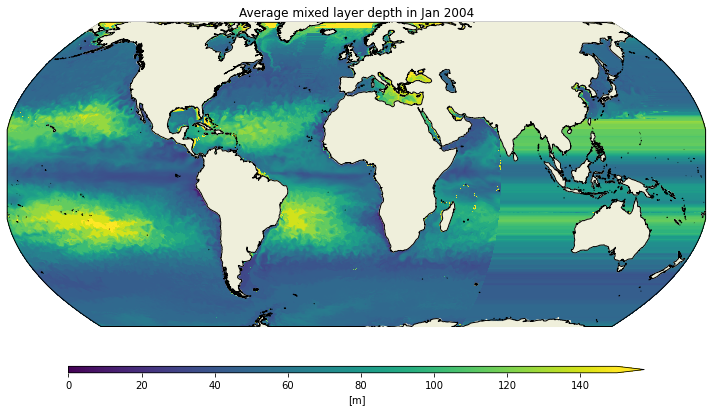

In [3]:
datadir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA_BGC/ORCA0083-N006/means/' 
dirread_mesh = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/' 

nav_lon = xr.open_dataset(dirread_mesh+'coordinates.nc',decode_times=False).nav_lon 
nav_lat = xr.open_dataset(dirread_mesh+'coordinates.nc',decode_times=False).nav_lat
#nav_lon = nav_lon.where(nav_lon<73,nav_lon-360)
#nav_lon = xr.open_dataset(datadir+'ORCA0083-N06_20040105d05D.nc').nav_lon 
# nav_lat = xr.open_dataset(datadir+'ORCA0083-N06_20040105d05D.nc').nav_lat

mldfiles = xr.open_mfdataset(glob(datadir+'ORCA0083-N06_200401*d05D.nc'),combine='by_coords')
#mldfiles = mldfiles.assign_coords(nav_lat=mldfiles.nav_lat.fillna(0.))
# mldfiles = mldfiles.assign_coords(nav_lon.where(mldfiles.nav_lon<73, mldfiles.nav_lon-360))

mldfiles = mldfiles.assign_coords(nav_lon=nav_lon)
mldfiles = mldfiles.assign_coords(nav_lat=nav_lat)

mld_mean = mldfiles.MED_XZE.mean(axis = 0)

projection = cartopy.crs.Robinson() #central_longitude=73+180)
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 1])
ax = fig.add_subplot(gs[0], projection=projection)

ax.coastlines(resolution='50m', zorder=6)
ax.add_feature(cartopy.feature.LAND, zorder=5)
ax.set_extent([-180, 180, -70, 70], crs=cartopy.crs.PlateCarree())
#ax.contourf(mld_mean['nav_lon'], mld_mean['nav_lat'], mld_mean['data'], transform = cartopy.crs.PlateCarree())

a = mld_mean.plot(x='nav_lon', y='nav_lat', add_colorbar=False, vmin=0, vmax=150, transform=cartopy.crs.PlateCarree(), rasterized=True) #norm=colors.LogNorm(vmin=0.01, vmax=1),
plt.title('Average mixed layer depth in Jan 2004')

cbaxes = fig.add_axes([0.1, 0.1, 0.8, 0.015])
plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=100, extend='max', label='[m]', use_gridspec=True)

fig.canvas.draw()
plt.tight_layout()
# savefig(fignum)